In [11]:
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('resources/data.csv')
data.head(5)

,Cases,Deaths,Vaccination Rate,Population,Median Age,Household Income,Heart Disease,Stroke,Party,County,State,Cases per Capita,Deaths per Capita
0,6104,57.0,39.2,24657.0,43.8,36685.0,321.0,78.6,REPUBLICAN,Abbeville,South Carolina,0.247556,0.002312
1,14951,269.0,51.8,62568.0,36.2,41177.0,476.2,93.6,REPUBLICAN,Acadia,Louisiana,0.238956,0.004299
2,6569,90.0,70.7,32742.0,45.9,43210.0,411.2,92.1,REPUBLICAN,Accomack,Virginia,0.200629,0.002749
3,5535,56.0,44.0,25325.0,27.7,40046.0,335.1,80.7,REPUBLICAN,Adair,Missouri,0.218559,0.002211
4,6678,65.0,34.8,22113.0,37.6,32986.0,575.0,62.7,REPUBLICAN,Adair,Oklahoma,0.301994,0.002939


In [12]:
#Binning income ranges to do anova analysis

bins = [-float('inf'), 50000, 70000, float('inf')]
income_ranges = ['<$50,000', "\$50,000-\$70,000", ">$75,000"]
data["Median Income Range"] = pd.cut(data["Household Income"], bins, labels=income_ranges, include_lowest=True)
data

,Cases,Deaths,Vaccination Rate,Population,Median Age,Household Income,Heart Disease,Stroke,Party,County,State,Cases per Capita,Deaths per Capita,Median Income Range
0,6104,57.0,39.2,24657.0,43.8,36685.0,321.0,78.6,REPUBLICAN,Abbeville,South Carolina,0.247556,0.002312,"<$50,000"
1,14951,269.0,51.8,62568.0,36.2,41177.0,476.2,93.6,REPUBLICAN,Acadia,Louisiana,0.238956,0.004299,"<$50,000"
2,6569,90.0,70.7,32742.0,45.9,43210.0,411.2,92.1,REPUBLICAN,Accomack,Virginia,0.200629,0.002749,"<$50,000"
3,5535,56.0,44.0,25325.0,27.7,40046.0,335.1,80.7,REPUBLICAN,Adair,Missouri,0.218559,0.002211,"<$50,000"
4,6678,65.0,34.8,22113.0,37.6,32986.0,575.0,62.7,REPUBLICAN,Adair,Oklahoma,0.301994,0.002939,"<$50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,7537,95.0,47.5,27974.0,35.7,31402.0,368.6,119.6,DEMOCRAT,Yazoo,Mississippi,0.269429,0.003396,"<$50,000"
1442,6386,94.0,47.6,21573.0,39.3,42361.0,472.9,86.2,REPUBLICAN,Yell,Arkansas,0.296018,0.004357,"<$50,000"
1443,38255,486.0,50.5,157816.0,38.2,59117.0,322.4,70.9,REPUBLICAN,Yellowstone,Montana,0.242403,0.003080,"\$50,000-\$70,000"
1444,9037,88.0,65.3,67587.0,39.5,90367.0,233.0,72.0,REPUBLICAN,York,Virginia,0.133709,0.001302,">$75,000"


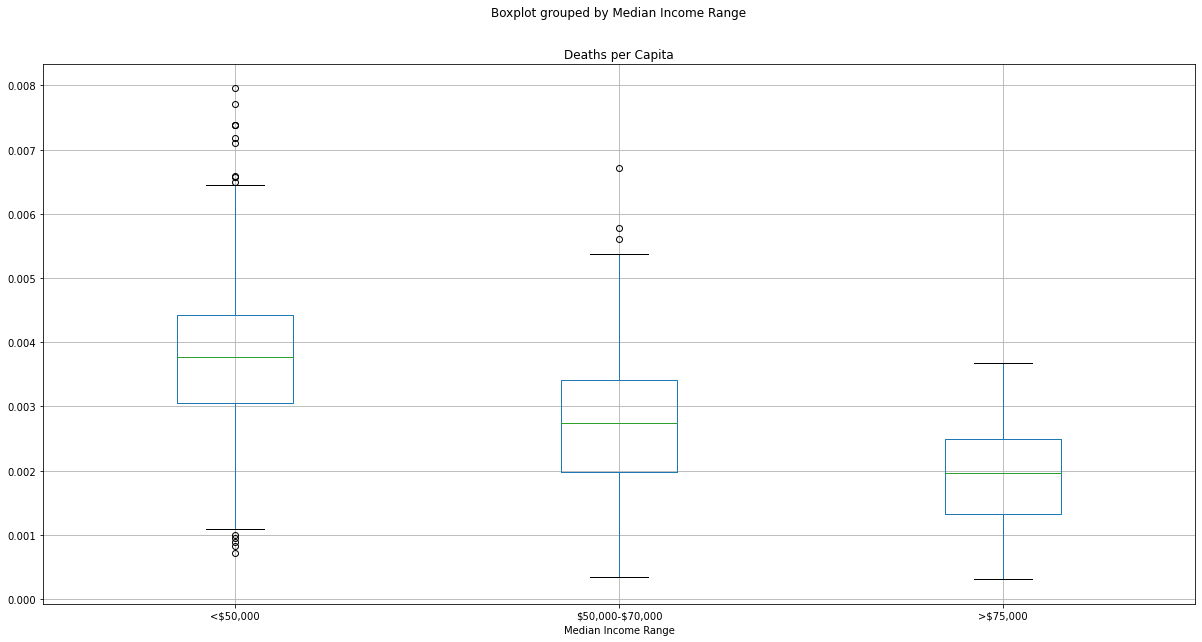

In [13]:
data.boxplot("Deaths per Capita", by="Median Income Range", figsize=(20, 10))
plt.show()

In [14]:
# Extract individual groups and perform ANOVA test
income_groups = []
for i in income_ranges:   
    income_groups.append(data[data["Median Income Range"] == i]["Deaths per Capita"])
_, p = stats.f_oneway(*income_groups)
print(f"The null hypothesis' pvalue for income ranges is {p}")

The null hypothesis' pvalue for income ranges is 2.053183505933904e-90


In [15]:
# Binning values for Vaccination Rates
bins = [20*x for x in range(1,5)]
vaccination_rates = [f'{bins[i-1]}%-{bins[i]}%' for i in range(1, len(bins))]
data["Vaccination Rate Range"] = pd.cut(data["Vaccination Rate"], bins, labels=vaccination_rates, include_lowest=True)
data

,Cases,Deaths,Vaccination Rate,Population,Median Age,Household Income,Heart Disease,Stroke,Party,County,State,Cases per Capita,Deaths per Capita,Median Income Range,Vaccination Rate Range
0,6104,57.0,39.2,24657.0,43.8,36685.0,321.0,78.6,REPUBLICAN,Abbeville,South Carolina,0.247556,0.002312,"<$50,000",20%-40%
1,14951,269.0,51.8,62568.0,36.2,41177.0,476.2,93.6,REPUBLICAN,Acadia,Louisiana,0.238956,0.004299,"<$50,000",40%-60%
2,6569,90.0,70.7,32742.0,45.9,43210.0,411.2,92.1,REPUBLICAN,Accomack,Virginia,0.200629,0.002749,"<$50,000",60%-80%
3,5535,56.0,44.0,25325.0,27.7,40046.0,335.1,80.7,REPUBLICAN,Adair,Missouri,0.218559,0.002211,"<$50,000",40%-60%
4,6678,65.0,34.8,22113.0,37.6,32986.0,575.0,62.7,REPUBLICAN,Adair,Oklahoma,0.301994,0.002939,"<$50,000",20%-40%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,7537,95.0,47.5,27974.0,35.7,31402.0,368.6,119.6,DEMOCRAT,Yazoo,Mississippi,0.269429,0.003396,"<$50,000",40%-60%
1442,6386,94.0,47.6,21573.0,39.3,42361.0,472.9,86.2,REPUBLICAN,Yell,Arkansas,0.296018,0.004357,"<$50,000",40%-60%
1443,38255,486.0,50.5,157816.0,38.2,59117.0,322.4,70.9,REPUBLICAN,Yellowstone,Montana,0.242403,0.003080,"\$50,000-\$70,000",40%-60%
1444,9037,88.0,65.3,67587.0,39.5,90367.0,233.0,72.0,REPUBLICAN,York,Virginia,0.133709,0.001302,">$75,000",60%-80%


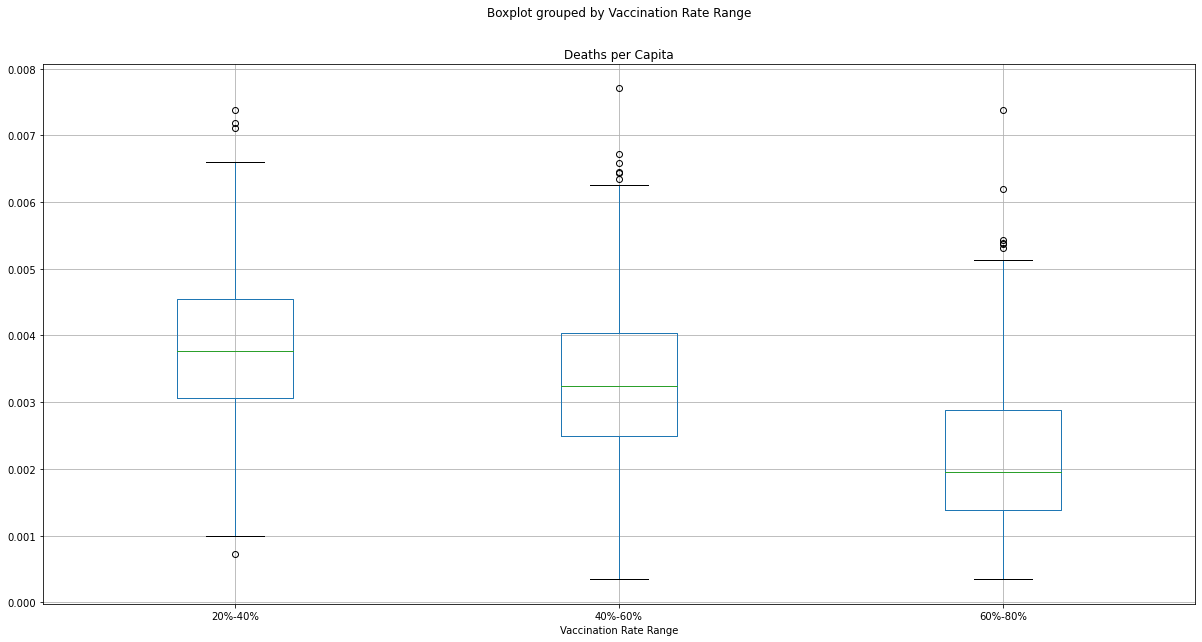

In [16]:
data.boxplot("Deaths per Capita", by="Vaccination Rate Range", figsize=(20, 10))

In [17]:
#Performing ANOVA test for vaccination rates
vax_groups = []
for i in vaccination_rates:   
    vax_groups.append(data[data["Vaccination Rate Range"] == i]["Deaths per Capita"])
_, p = stats.f_oneway(*vax_groups)
print(f"The null hypothesis' pvalue for vaccination rates is {p}")

The null hypothesis' pvalue for vaccination rates is 9.010006665976374e-50


In [18]:
#Grouping data by both Income Range and Vaccination Rate and then extracting the mean Deaths per Capita
grouped = data[['Deaths per Capita', 'Median Income Range', 'Vaccination Rate Range']] \
                .groupby(['Median Income Range','Vaccination Rate Range']).mean()
grouped

Deaths per Capita
Median Income Range Vaccination Rate Range                   
<$50,000            20%-40%                          0.004063
                    40%-60%                          0.003690
                    60%-80%                          0.003298
\$50,000-\$70,000   20%-40%                          0.003262
                    40%-60%                          0.002910
                    60%-80%                          0.001927
>$75,000            20%-40%                          0.001982
                    40%-60%                          0.002085
                    60%-80%                          0.001920

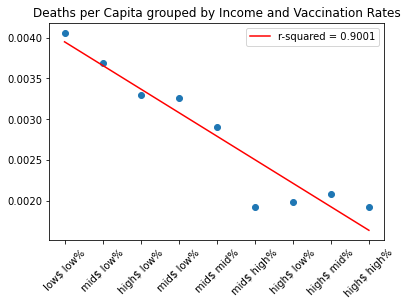

In [19]:
#creating a scatter plot of deaths per capita based on values from grouped dataframe
x = [i for i in range(9)]
y = grouped['Deaths per Capita']
ticks = ['low$ low%', 'mid$ low%', 'high$ low%', 'mid$ low%', 'mid$ mid%', 'mid$ high%', 'high$ low%', 'high$ mid%', 'high$ high%']
plt.scatter(x, y)
plt.xticks(x, ticks, rotation=45)
(m, b, rvalue, p, q) = stats.linregress(x, y)
regress = [m*xs + b for xs in x]
plt.plot(x, regress, 'r-', label=f'r-squared = {round(rvalue**2, 4)}')
plt.title('Deaths per Capita grouped by Income and Vaccination Rates')
plt.legend()
plt.show()

In [20]:
#function to get outliers from column of dataframe, returns dataframe of low outliers and high outliers
def getoutliers(x, y):
    quant = x[y].quantile([.25,.5,.75])
    iqr = quant[.75]-quant[.25]
    return x.where(x[y] < (quant[.25] - (1.5 * iqr))).dropna(),  x.where(x[y] > (quant[.75] + (1.5 * iqr))).dropna()
        

In [21]:
#filtering for low income counties (where most outliers are present), then 
#get outlier dataframes and dropping the from low income dataframe
lowincome_df = data.where(data["Median Income Range"] == "<$50,000").dropna()
lowincome_df.drop(columns = ['Population', 'Cases', 'Deaths', 'Cases per Capita', 'Median Age'], inplace = True)
outliers_low, outliers_high = getoutliers(lowincome_df, 'Deaths per Capita')
lowincome_df.drop(outliers_low.index, inplace = True)
lowincome_df.drop(outliers_high.index, inplace = True)


In [22]:
#creating summary dataframes with median of each relevant statistic and a separate 
#standard deviation dataframe for each of those statistics

outliers = pd.DataFrame([outliers_high.describe().loc['50%'], 
                         lowincome_df.describe().loc['50%'], outliers_low.describe().loc['50%']], 
                        ['High Outliers', 'In Range', 'Low Outliers'])
errors =  pd.DataFrame([outliers_high.describe().loc['std'], 
                        lowincome_df.describe().loc['std'], outliers_low.describe().loc['std']], 
                       ['High Outliers', 'In Range', 'Low Outliers'])


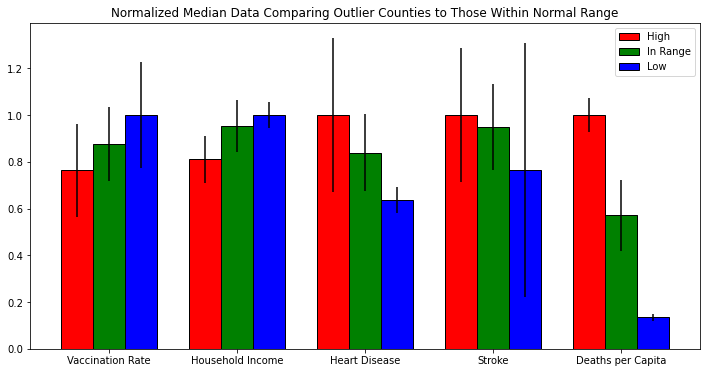

In [23]:
#Normalize the data from outliers and errors dataframes and present summary bar chart
for i in outliers.columns:
    maxval = outliers[i].abs().max()
    outliers[i] = outliers[i] / maxval
    errors[i] = errors[i]/maxval
    
outliers

bar_width = 0.25
fig = plt.subplots(figsize =(12, 6))

high = outliers.iloc[0]
mid = outliers.iloc[1]
low = outliers.iloc[2]

br1 = np.arange(len(outliers.columns))
br2 = [x + bar_width for x in br1]
br3 = [x + bar_width for x in br2]

plt.bar(br1, high, color ='r', width = bar_width,
        edgecolor ='black', label ='High', yerr=errors.iloc[0])
plt.bar(br2, mid, color ='g', width = bar_width,
        edgecolor ='black', label ='In Range', yerr=errors.iloc[1])
plt.bar(br3, low, color ='b', width = bar_width,
        edgecolor ='black', label ='Low', yerr = errors.iloc[2])

plt.xticks([r + bar_width for r in range(len(outliers.columns))],
        outliers.columns)

plt.title('Normalized Median Data Comparing Outlier Counties to Those Within Normal Range')
plt.legend()
plt.show()

In [25]:
outliers_low.drop(columns = 'Party')

,Vaccination Rate,Household Income,Heart Disease,Stroke,County,State,Deaths per Capita,Median Income Range,Vaccination Rate Range
163,35.9,49348.0,301.8,57.2,Caledonia,Vermont,0.000723,"<$50,000",20%-40%
604,64.3,45528.0,308.4,166.6,Humboldt,California,0.000950,"<$50,000",60%-80%
1034,52.3,44315.0,321.5,103.6,Pitt,North Carolina,0.000823,"<$50,000",40%-60%
1099,38.2,49910.0,269.8,66.5,Riley,Kansas,0.000996,"<$50,000",20%-40%
1371,54.3,45268.0,260.2,54.7,Watauga,North Carolina,0.000887,"<$50,000",40%-60%
